In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
iris.target.shape
iris.data.shape

(150, 4)

In [0]:
iris['feature_names']  #칼럼명 확인

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
# 훈련 데이터와 테스트 데이터 나누기
# train_test_split (문제, 답, random_state = 0)  random_state는 패턴을 고정시켜주는 값
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris['data'],
                                                   iris['target'],
                                                   random_state = 0)


In [0]:
## 시각화
# DataFrame에 들어가야 하는 데이터 타입 dictionary
# Series에 들어가는 데이터 타입 list

iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df['y'] = Y_train
iris_df['y'] = iris_df['y'].astype('category')   #범주형으로 타입 변경

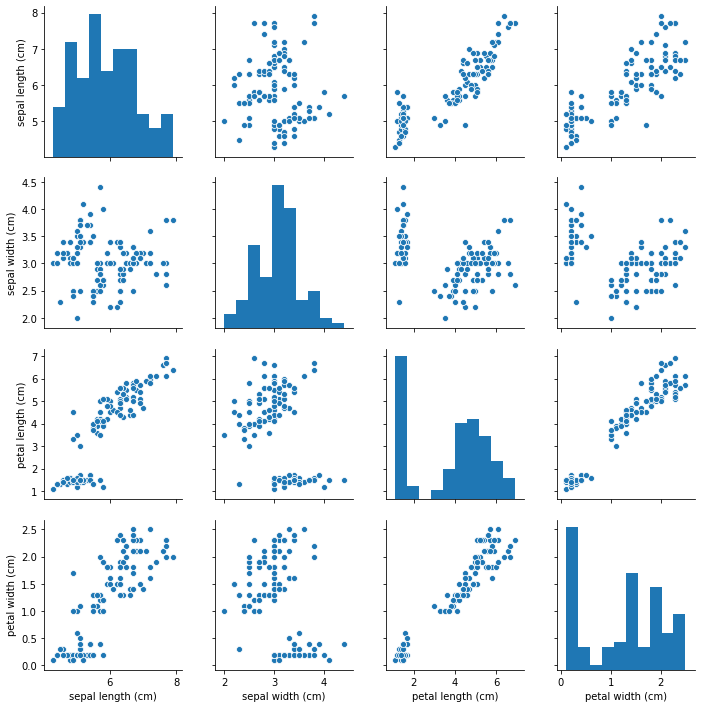

In [0]:
sns.pairplot(iris_df.iloc[:,0:4])

# iloc : 인덱스로 선택
# loc : 칼럼으로 선택

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F647FBCFD0>,
      dtype=object)

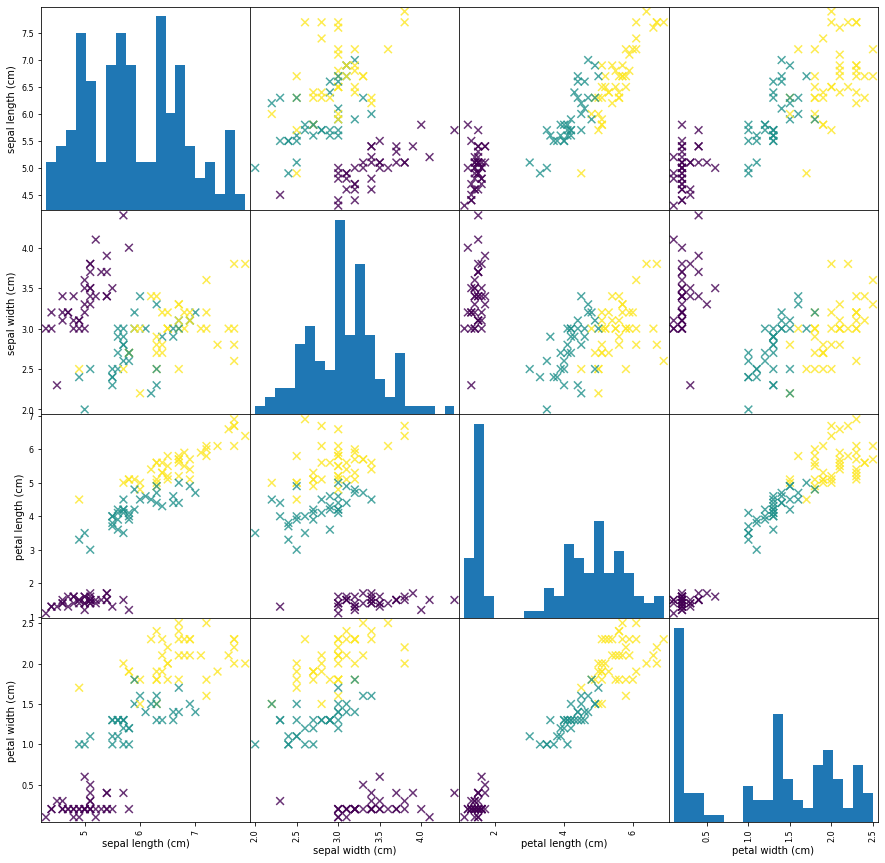

In [0]:
# 판다스 플로팅 기능
pd.plotting.scatter_matrix(iris_df, c=Y_train, #색
                          figsize =(15,15),
                          marker='x',
                          hist_kwds={'bins':20}, #막대의 개수
                          s=60,
                          alpha=0.8) #투명도

## 첫번째 모델 만들기
>- knn model ( k- nearest neighbor)

In [0]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# 학습
knn.fit(X_train, Y_train)

print(type(X_train))  # numpy.ndarray

# 예측
X_new = np.array([[5, 2.9, 1, 0.2]])  # 똑같이 numpy.ndarray 형태로

pred = knn.predict(X_new)
pred

<class 'numpy.ndarray'>


array([0])

In [0]:
pred_targetname = iris['target_names'][pred]
pred_targetname

array(['setosa'], dtype='<U10')

In [0]:
# 평가하기
print("테스트 셋의 정확도 : {:.2f}".format(np.mean(pred == Y_test)))
#print("테스트 셋의 정확도 : {%.2f}")   # %형태

테스트 셋의 정확도 : 0.34


## 타이타닉 셋으로 실습

In [0]:
titanic = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [0]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
pd.isnull(titanic).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [0]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
titanic.Age.mean()

29.69911764705882

In [0]:
titanic.Age.fillna(30).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [0]:
titanic.Embarked.fillna(method='ffill').head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [0]:
titanic.Sex = pd.get_dummies(titanic.Sex)

In [0]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic['Survived'] = titanic['Survived'].astype('category')

In [0]:
test.Sex = pd.get_dummies(test.Sex)

In [0]:
test.Age.fillna(30).head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
## k=5로 설정
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
from sklearn.model_selection import train_test_split
f_names = ['Pclass','SibSp','Fare','Sex']
X_train, X_test, Y_train, Y_test = train_test_split(titanic[f_names],
                                                   titanic['Survived'],
                                                   random_state = 0)

In [0]:
knn.fit(X_train, Y_train)

#print(type(X_train))  # numpy.ndarray
#X_new = test[f_names]
# 예측
pred = knn.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [0]:
an = pd.read_csv('./data/gender_submission.csv')

In [0]:
print("테스트 셋의 정확도 : {:.2f}".format(np.mean(pred == Y_test)))

테스트 셋의 정확도 : 0.78
